# Gitcoin Dynamical Network generation

03dec2020

---

On this notebook, we use a cadCAD model for retrieving the first 2000 contribution events from Gitcoin Grants Round 7. We generate a dynamical network where we have a NetworkX Digraph for each sequential point. 

We also calculate the CLR match and the theoretical match (match before normalization) for each point on time. We perform a A/B test in regards to the presence of the user pairwise comparison term.



## Dependences & parameters

In [1]:
from sim.run import run
import matplotlib.pyplot as plt
import networkx as nx
import plotly.express as px
import pandas as pd

## Execute simulation

In [2]:
result = run()


                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

Execution Mode: local_proc
Configuration Count: 1
Dimensions of the first simulation: (Timesteps, Params, Runs, Vars) = (100, 5, 1, 12)
Execution Method: local_simulations
SimIDs   : [0]
SubsetIDs: [0]
Ns       : [0]
ExpIDs   : [0]
Execution Mode: single_threaded
Total execution time: 0.24s


## Data analysis



In [3]:
df = result.loc[(0, 0, 1, slice(None))]


In [4]:
### Quadratic Funding with Pairwise term

In [5]:
fig = px.line(df.reset_index(),
              x='timestep',
              y=['quadratic_total_match', 'quadratic_total_funding'])

fig.show()

In [6]:
y = df.quadratic_total_funding / df.quadratic_total_match
y.name = 'funding_per_match'
px.line(y.reset_index(),
        x='timestep',
        y='funding_per_match')

### Quadratic Funding without Pairwise term

In [7]:
fig = px.line(df.reset_index(),
              x='timestep',
              y=['simple_quadratic_total_match', 'simple_quadratic_total_funding'])
fig.show()

In [8]:
y = df.simple_quadratic_total_funding / df.simple_quadratic_total_match
y.name = 'funding_per_match'
px.line(y.reset_index(),
        x='timestep',
        y='funding_per_match')

In [9]:
from utils import plot_contributions
c = df.contributions.iloc[-1]
plot_contributions(c)

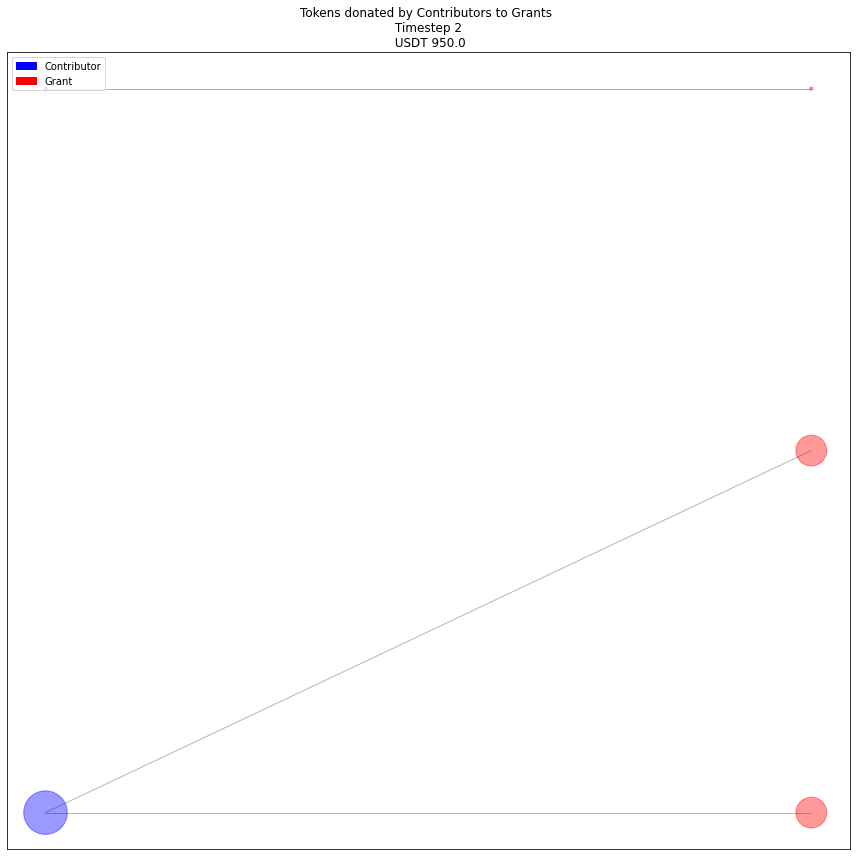

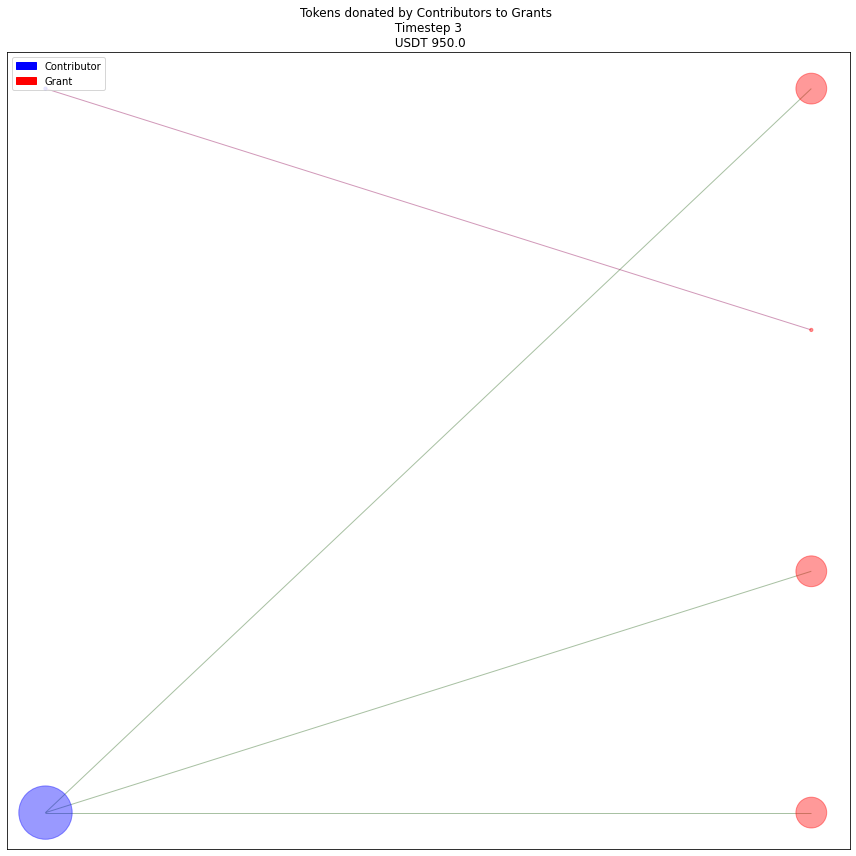

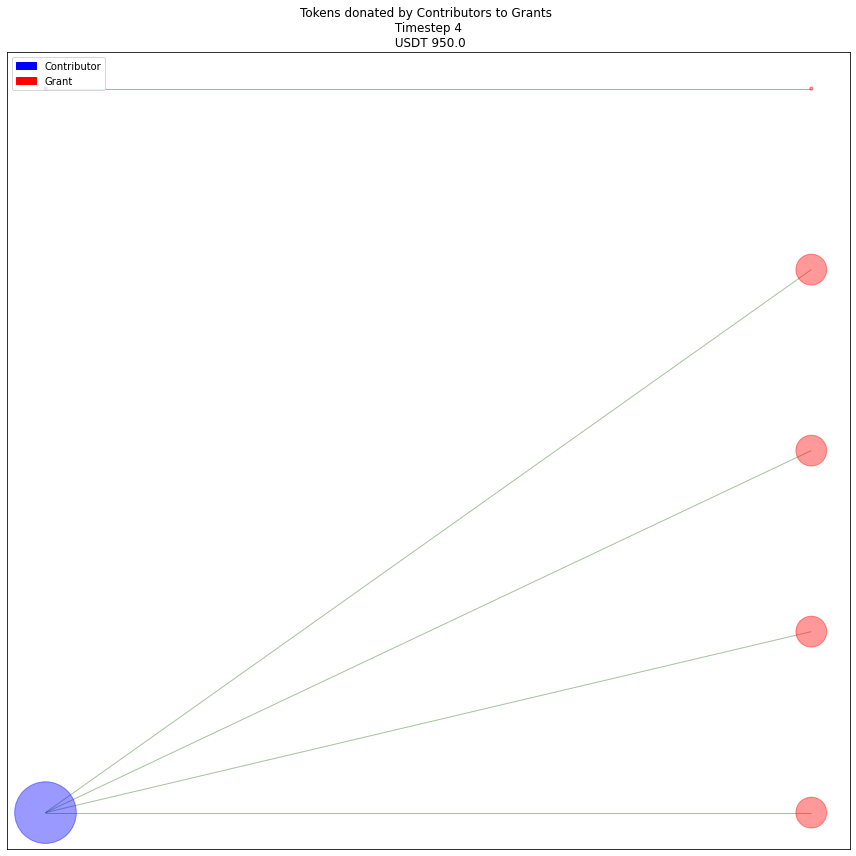

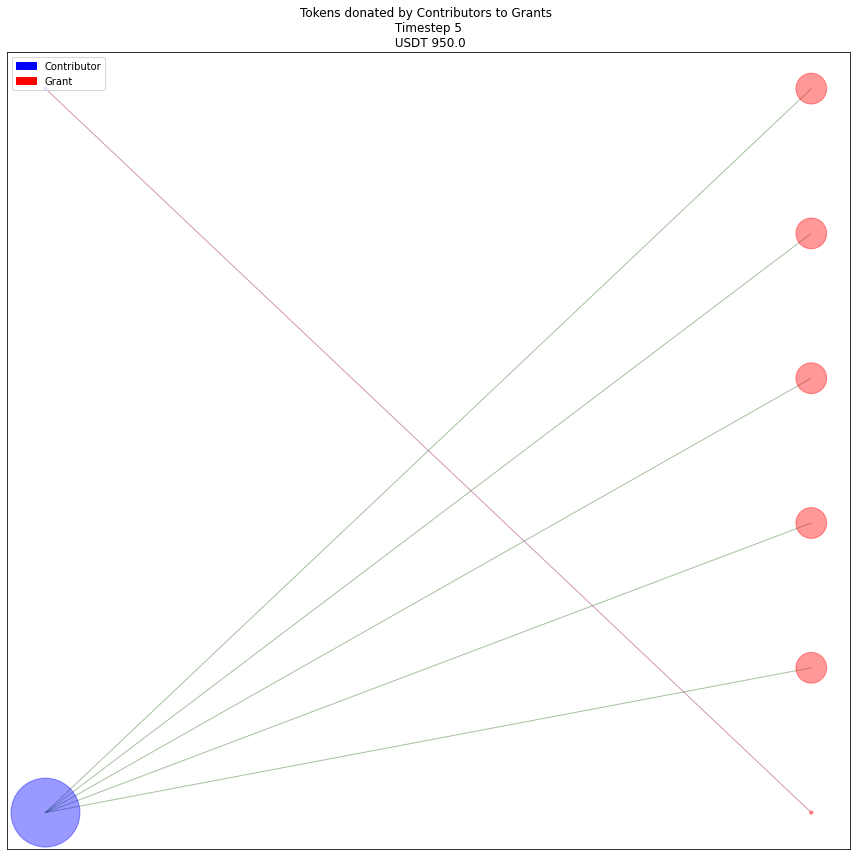

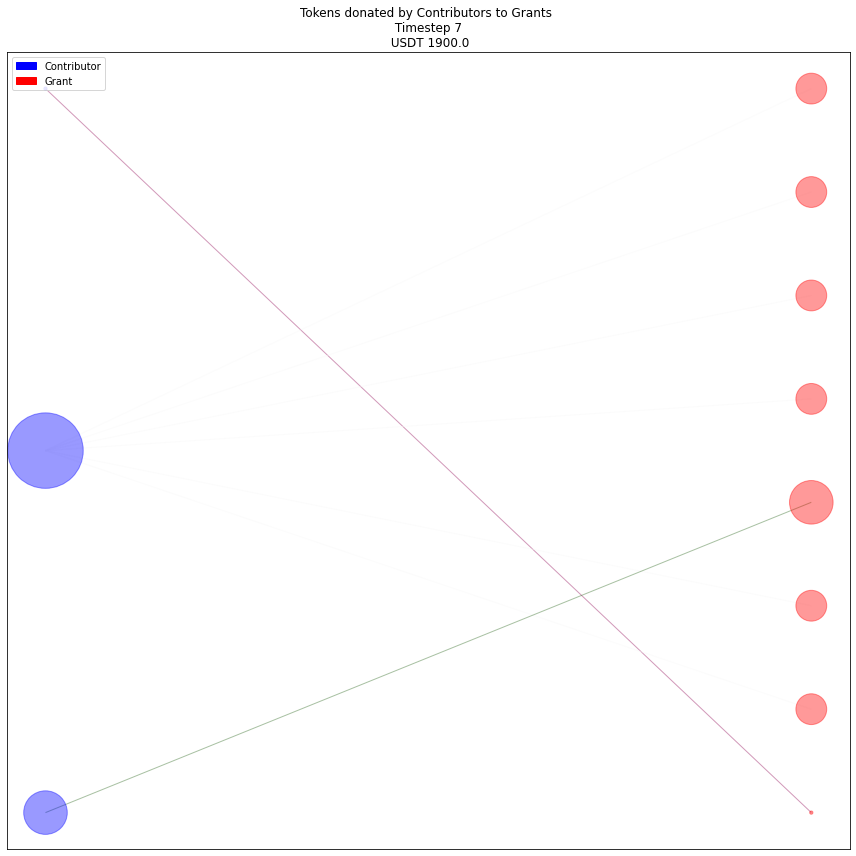

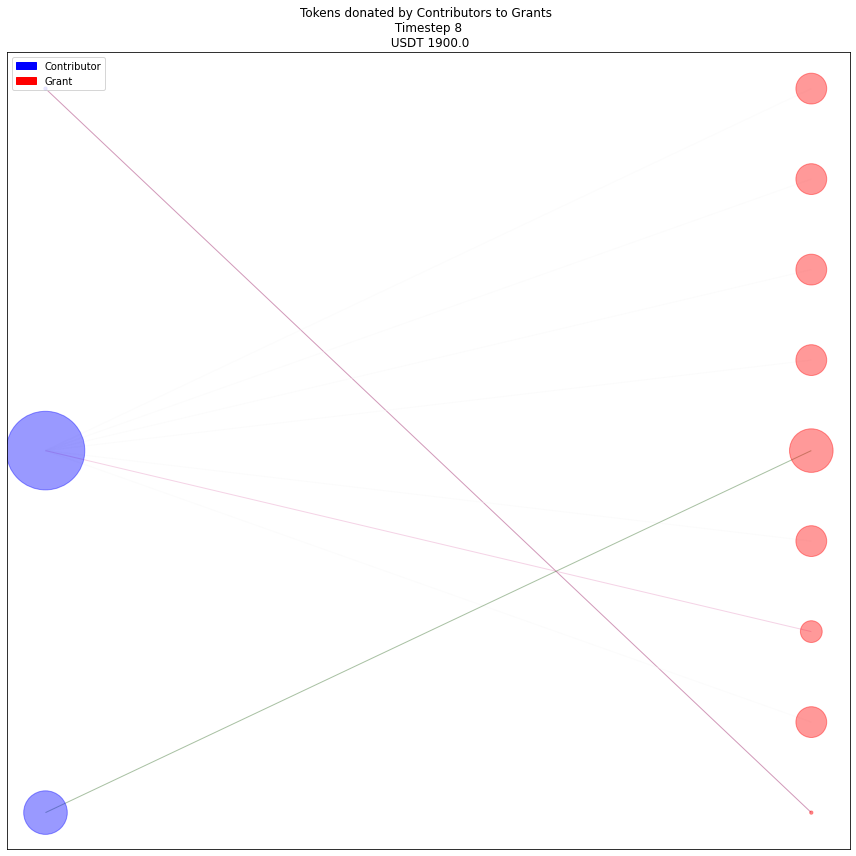

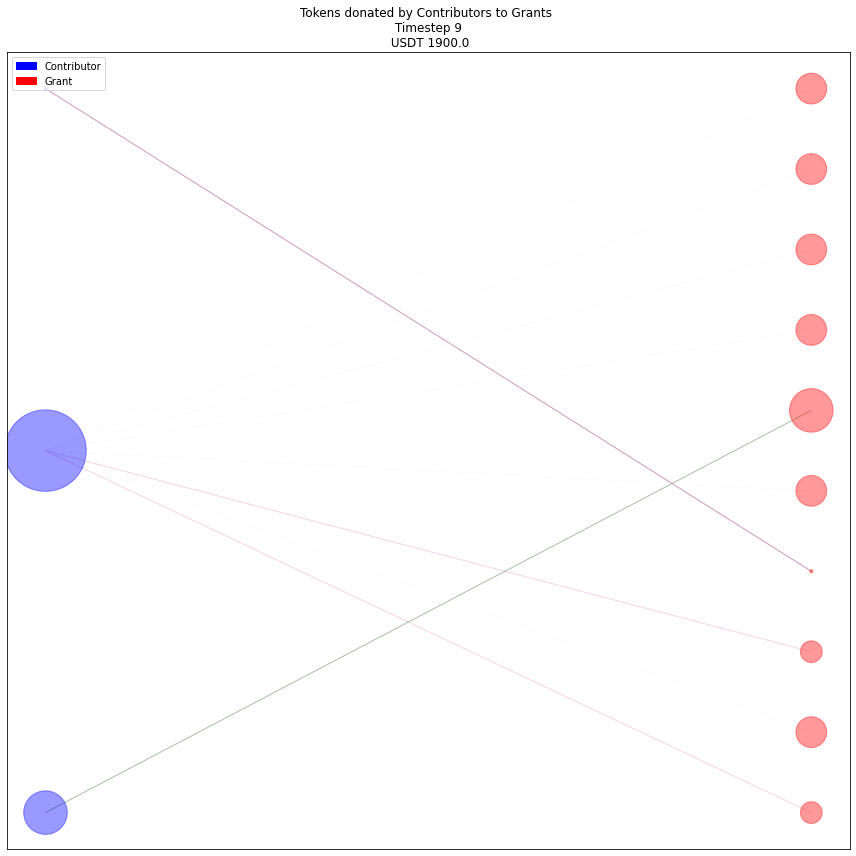

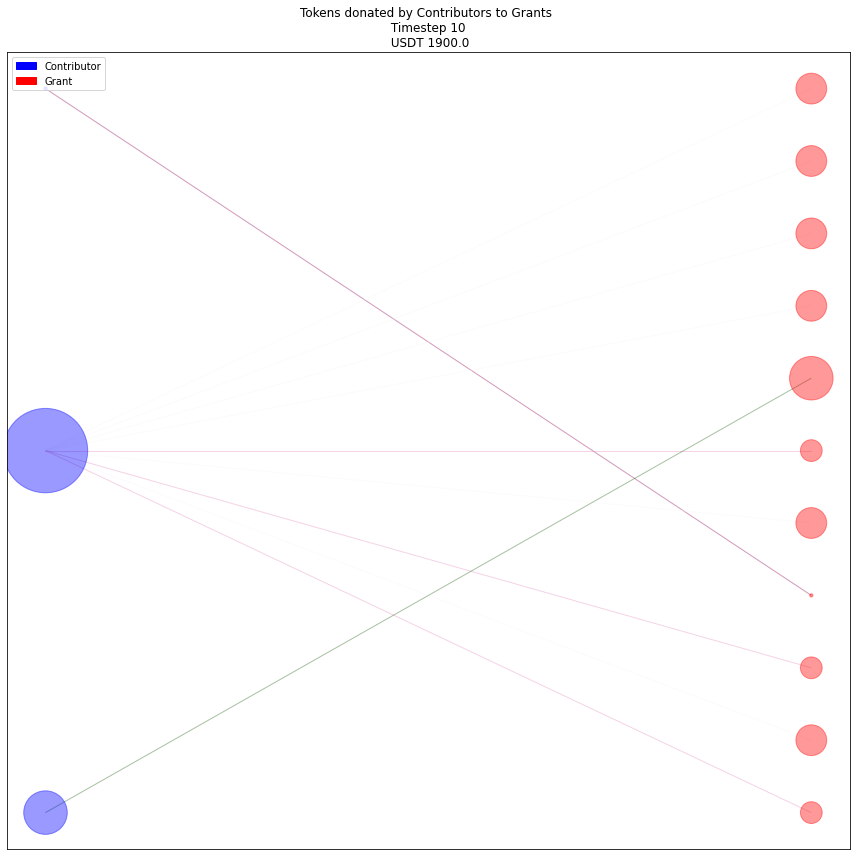

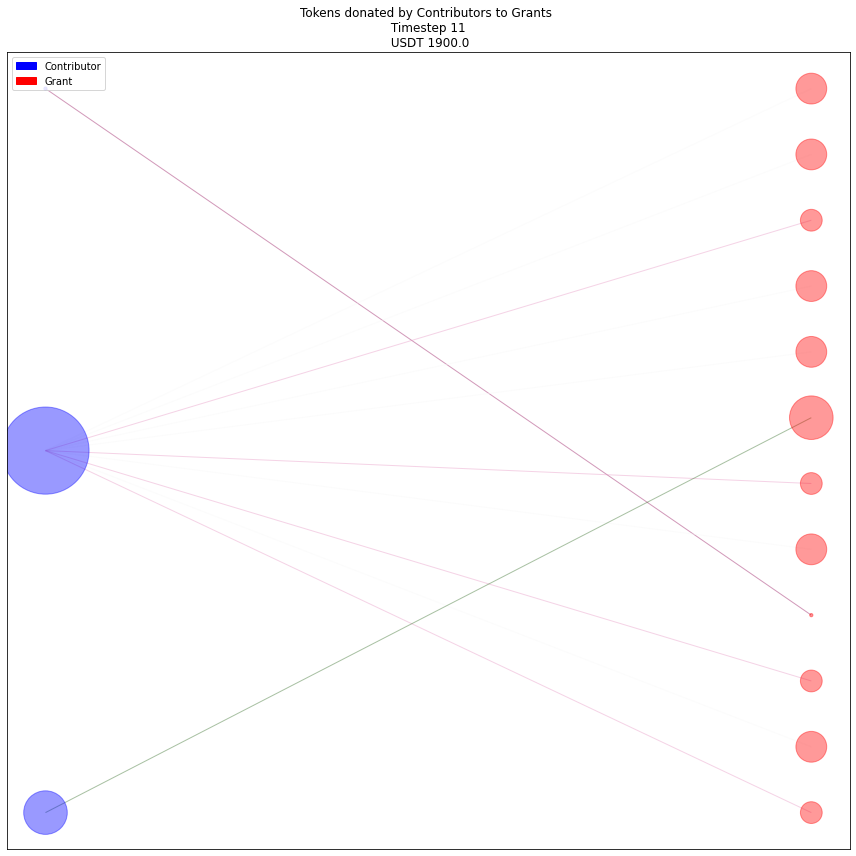

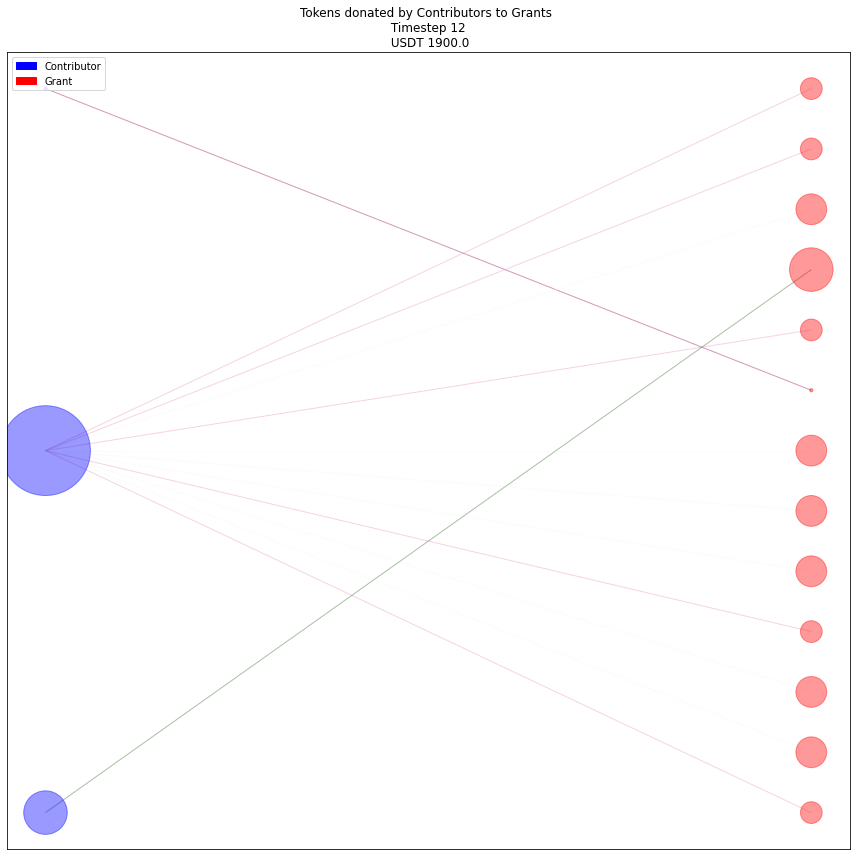

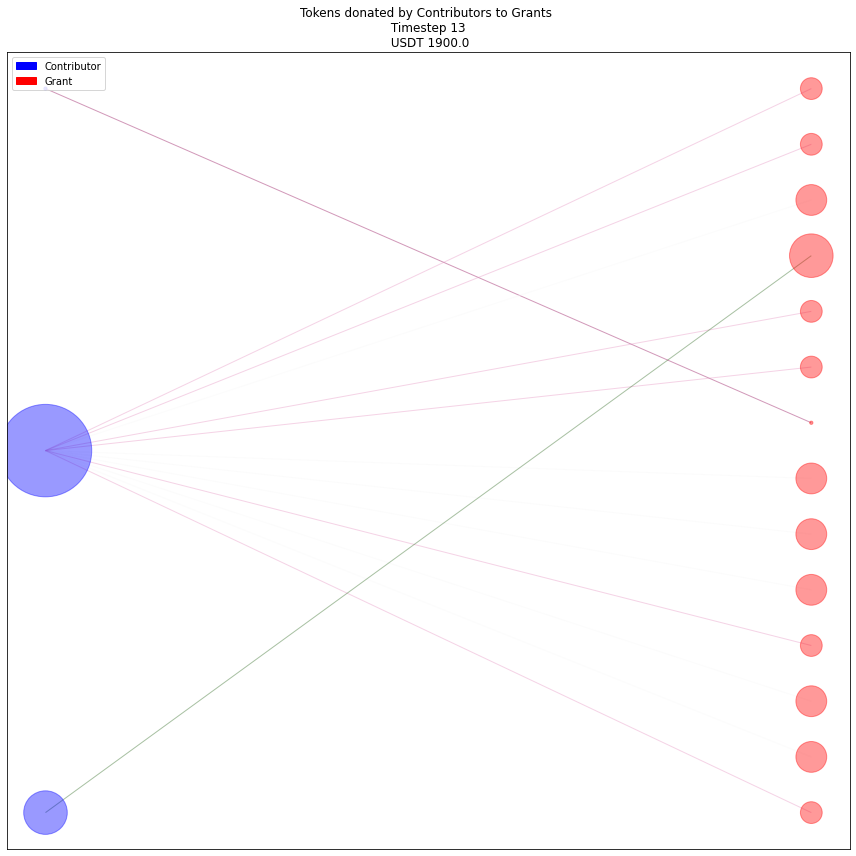

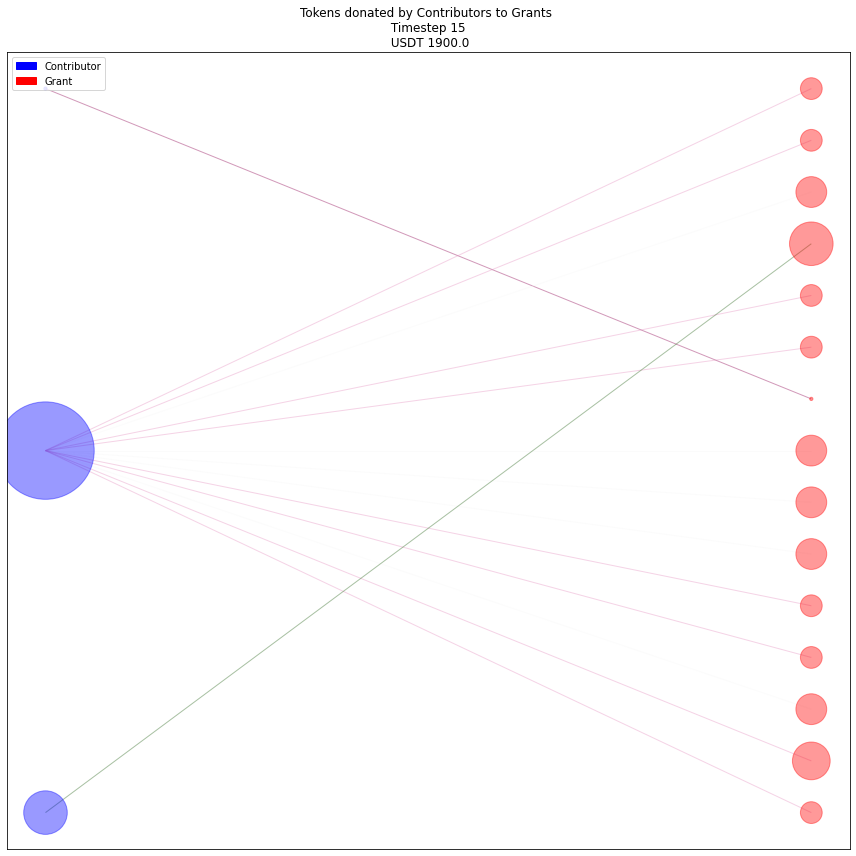

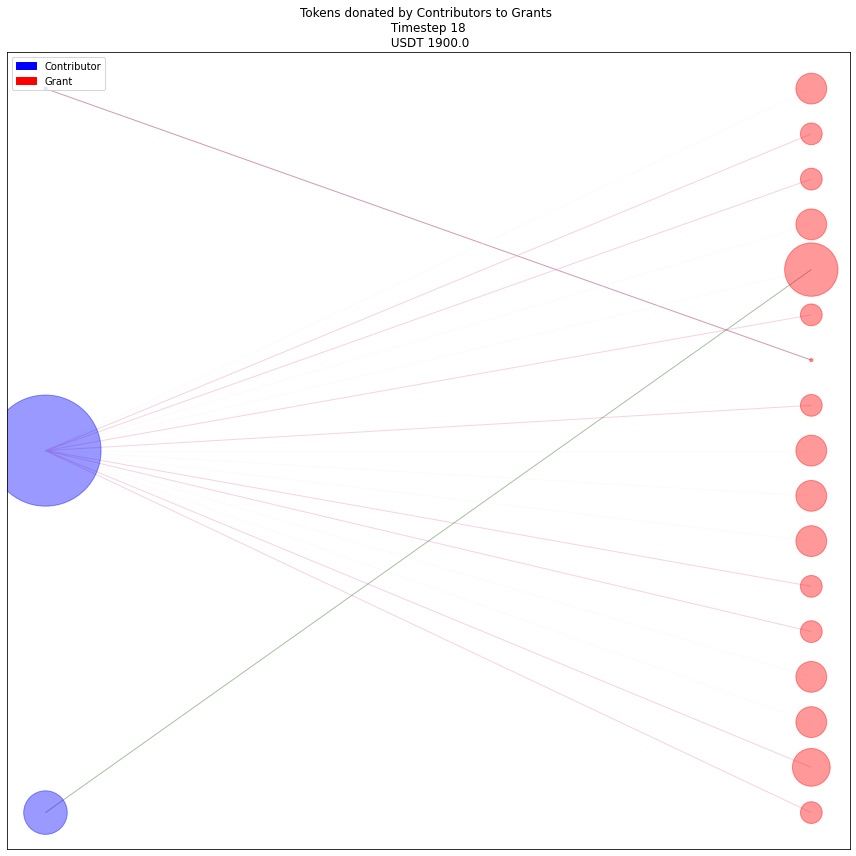

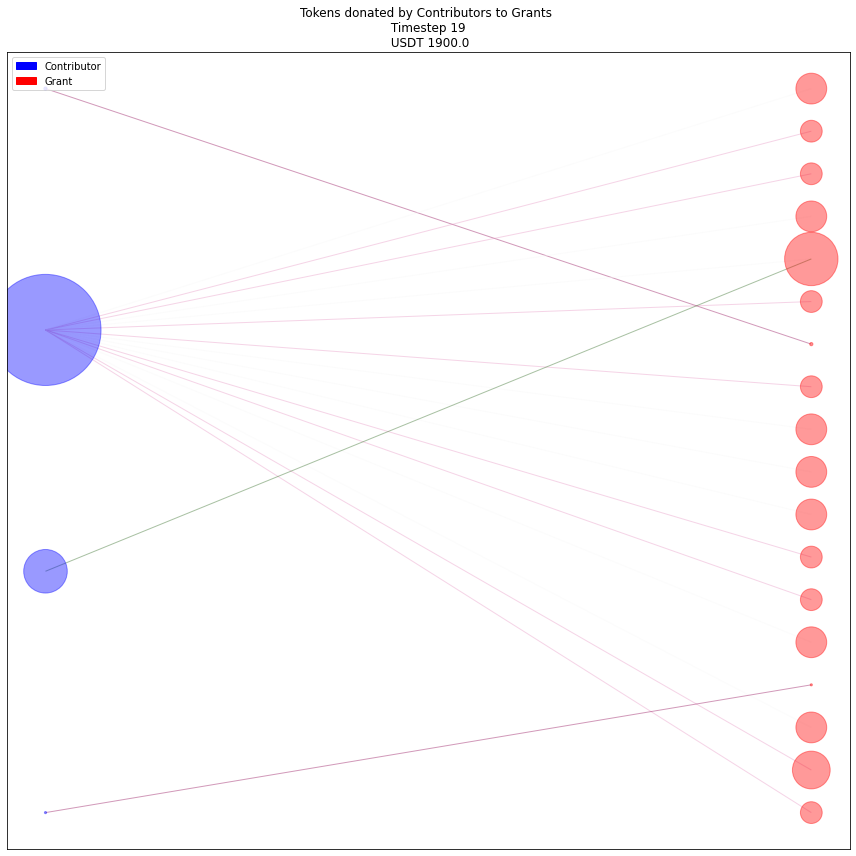

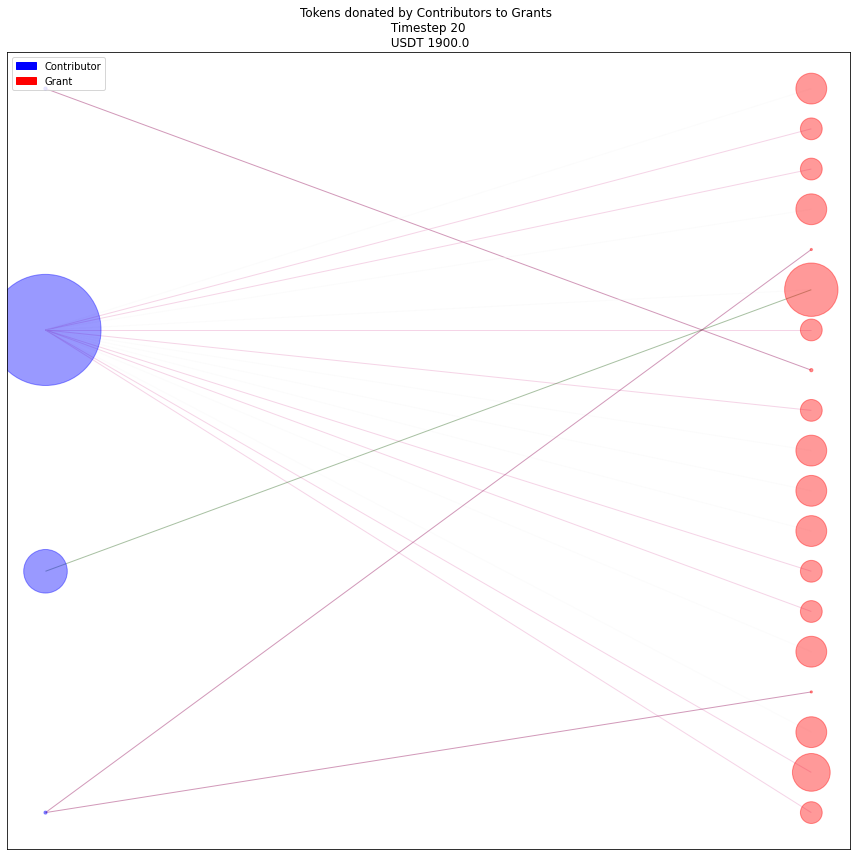

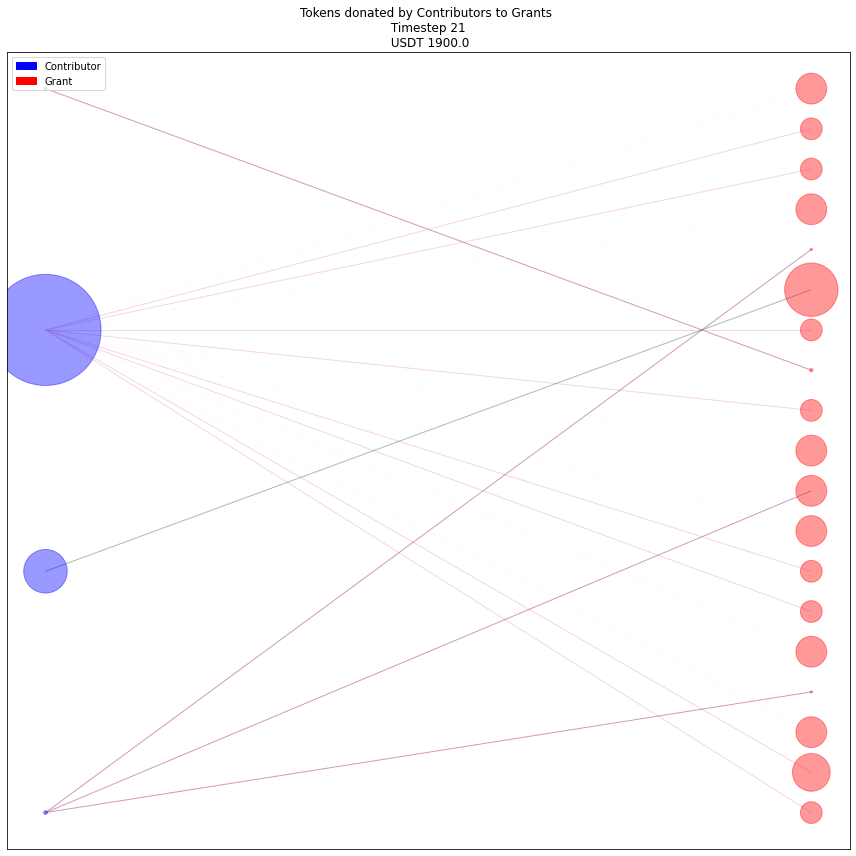

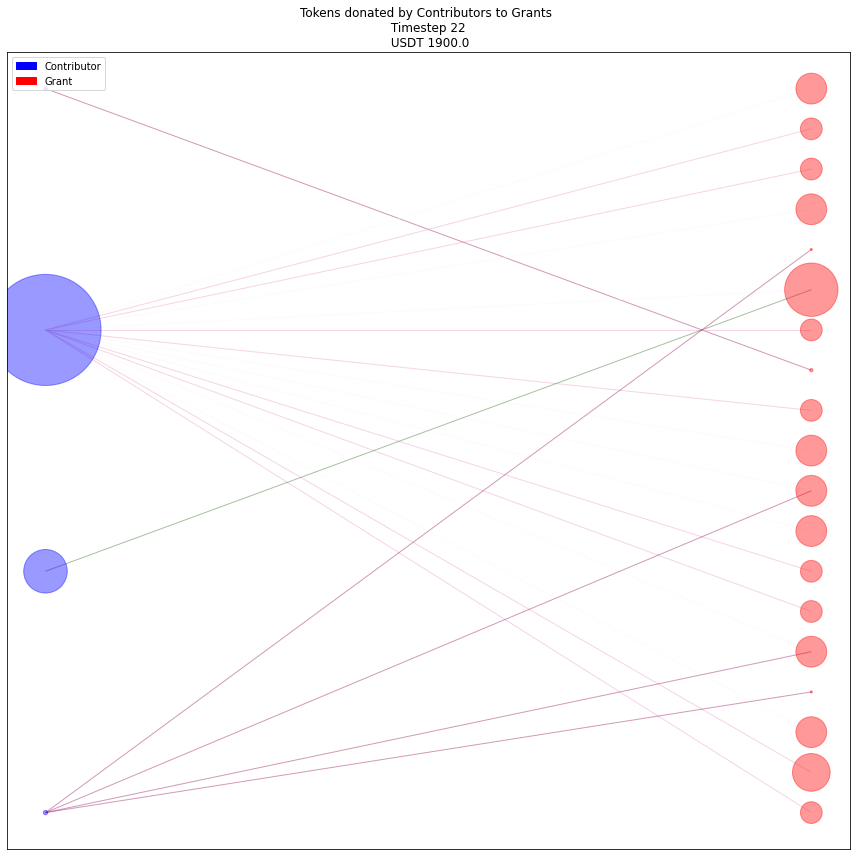

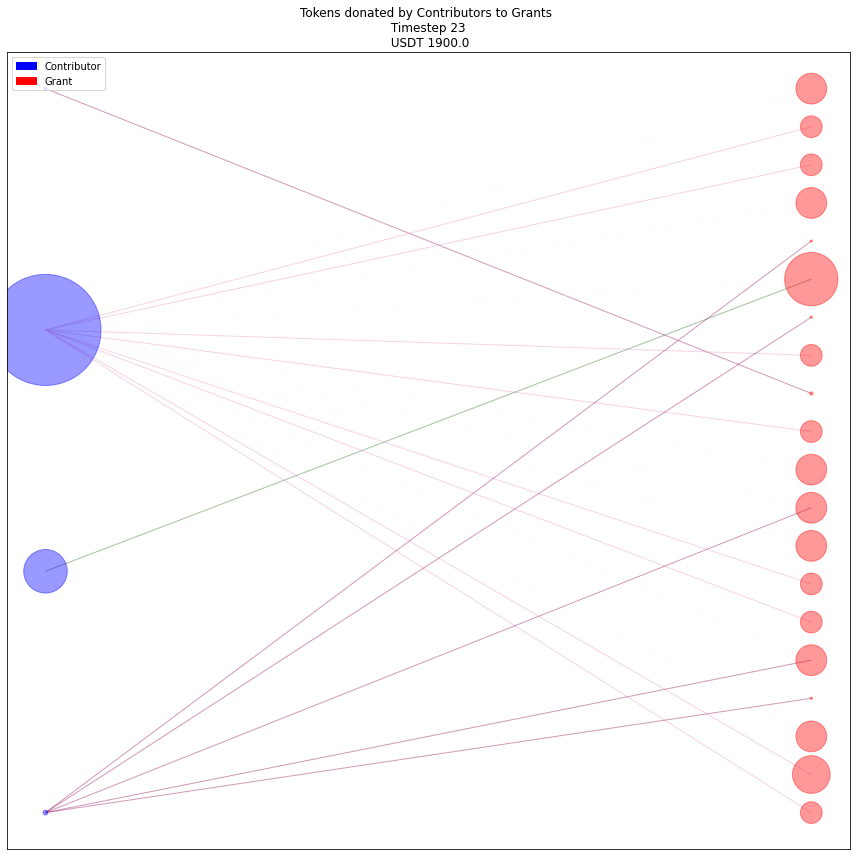

KeyboardInterrupt: 

<Figure size 864x864 with 0 Axes>

In [10]:
from utils import create_video_snap
import os
os.chdir('..')

create_video_snap(df.contributions.iloc[1:])


In [11]:
g_df = pd.DataFrame(c)

contributor_nodes = g_df.contributor.values
grant_nodes = g_df.grant.values
amount_edges = g_df.amount.values
sybil_edges = g_df.sybil_score.values

G = nx.Graph()
for i in contributor_nodes:
    G.add_node(i)
    G.nodes[i]['type']= 'Contributor'

for j in grant_nodes:
    G.add_node(j)
    G.nodes[j]['type']= 'Grant'

for i,j,p in zip(contributor_nodes,grant_nodes,range(0,len(grant_nodes))):
    G.add_edge(i, j)
    G.edges[(i,j)]['amount'] = amount_edges[p]
    G.edges[(i,j)]['type'] = 'support'
    G.edges[(i,j)]['sybil_score'] = sybil_edges[p]
    
    


In [15]:
donors = [] 
for i in G.nodes:
    if G.nodes[i]['type'] == 'Contributor':
        donors.append(i)
        
unique_donors = set(donors)